In [1]:
# imports
import imaids
import os
import sys
import time
import traceback
import numpy
import json
import numpy as np
import radia as _rad
from matplotlib import pyplot as plt

## Block

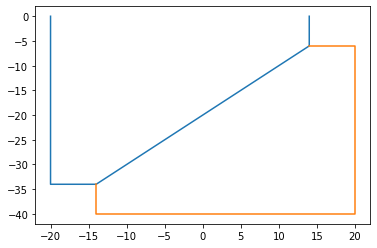

In [2]:
shape = [[[-14, -6], [-20, -6], [-20, -40], [14, -40], [14, -34]],
         [[-14, 0], [-14, -6], [14, -34], [20, -34], [20, 0]]
            ]
shape_flip = [[[-14, -34], [-14, -40], [20, -40], [20, -6], [14, -6]],
         [[-14, -34], [-20, -34], [-20, 0], [14, 0], [14, -6]]
            ]

subdivision = [[3, 3, 2], [3, 3, 2]]

### Only for plotting ###
shape01 = np.array([[-20, 0], [-20, -34], [-14, -34], 
                    [14, -6], [14, 0]])
shape02 = np.array([[-14, -34], [-14, -40],
         [20, -40], [20, -6], [14, -6]])
shape01_flip = np.array(shape_flip[0])
shape02_flip = np.array(shape_flip[1])
plt.plot(shape01.transpose()[0], shape01.transpose()[1])
plt.plot(shape02.transpose()[0], shape02.transpose()[1])
#plt.plot(shape01_flip.transpose()[0], shape01_flip.transpose()[1])
#plt.plot(shape02_flip.transpose()[0], shape02_flip.transpose()[1])

In [3]:
xmin, xmax, xnpts = -10, 10, 21
zmin, zmax, znpts = -700, 700, 2801
x = np.linspace(xmin, xmax, xnpts)
z = np.linspace(zmin, zmax, znpts)

start_blocks_length = [3.075, 3.075, 3.075, 3.075, 3.075, 3.075, 12.3]
start_blocks_distance = [6, 0, 2.9, 1, 0, 0.2, 0.2]

end_blocks_length = [3.075, 3.075, 3.075, 3.075, 3.075, 3.075]
end_blocks_distance = [0.2, 0, 1, 2.9, 0, 6]


mr = 1.25
nr_periods = 18

magnetizations = np.array(
      [[0,mr,0],
       [0,0,-mr], [0,0,-mr],
       [0,-mr,0], [0,-mr,0], [0,-mr,0],
       [0,0,mr]]
    + nr_periods*[[0,mr,0], [0,0,-mr],
                  [0,-mr,0], [0,0,mr]]
    + [[0,mr,0], [0,mr,0], [0,mr,0],
       [0,0,-mr], [0,0,-mr],
       [0,-mr,0]])
# In the APU implementation, the superior cassette is the one
# created by rotation of the inferior cassette around (0,0,1).
magnetization_dict = {'cs': -1*magnetizations, 'ci': magnetizations}


energy = 3
rkstep = 0.5
skip_poles = 4
papu = imaids.models.APU(cs_block_shape=shape_flip,
                        ci_block_shape=shape,
                        mr=1.25, gap=8, nr_periods=nr_periods, period_length=50,
                        block_shape=shape, block_subdivision=subdivision,
                        longitudinal_distance=0.2,
                        start_blocks_length=start_blocks_length,
                        start_blocks_distance=start_blocks_distance,
                        end_blocks_length=end_blocks_length,
                        end_blocks_distance=end_blocks_distance
                        )
papu.create_radia_object(magnetization_dict=magnetization_dict)

In [4]:
papu.cassettes['cs'].magnetization_list

[[-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, 1.25, -0.0],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0, -1.25],
 [-0.0, -1.25, -0.0],
 [-0.0, -0.0, 1.25],
 [-0.0, 1.25, -0.0],
 [-0.0, -0.0,

In [5]:
papu.cassettes['ci'].magnetization_list

[[0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, -1.25, 0.0],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.0, 1.25, 0.0],
 [0.0, 0.0, -1.25],
 [0.0, -1.25, 0.0],
 [0.0, 0.0, 1.25],
 [0.

In [6]:
papu.draw()

True

In [7]:
papu.set_cassete_positions(dg=18.75)

t1 = time.time()
papu.solve()
print('> solve() took: {:.3f} seconds'.format(time.time()-t1))


> solve() took: 38.654 seconds


Bx amplitude [T]:  0.024148308979159667
By amplitude [T]:  0.49008651734340225


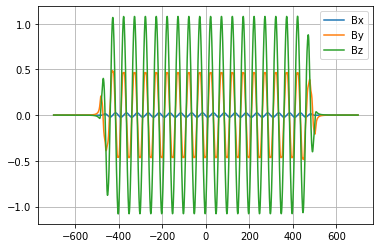

In [8]:
# field

b = papu.get_field(x=0,y=0,z=z)

plt.plot(z, b[:,0], label='Bx')
plt.plot(z, b[:,1], label='By')
plt.plot(z, b[:,2], label='Bz')
plt.legend()
plt.grid()

# amplitude

bxamp, byamp, _, _ = papu.calc_field_amplitude()

print('Bx amplitude [T]: ', bxamp)
print('By amplitude [T]: ', byamp)

IBx [G.cm]:  6.939831477786814
IBy [G.cm]:  0.07339366541562423
IBz [G.cm]:  -0.1150454497000861
IIBx [kG.cm²]:  0.4793054274469325
IIBy [kG.cm²]:  2.2786400669686895
IIBz [kG.cm²]:  0.17991915957821708


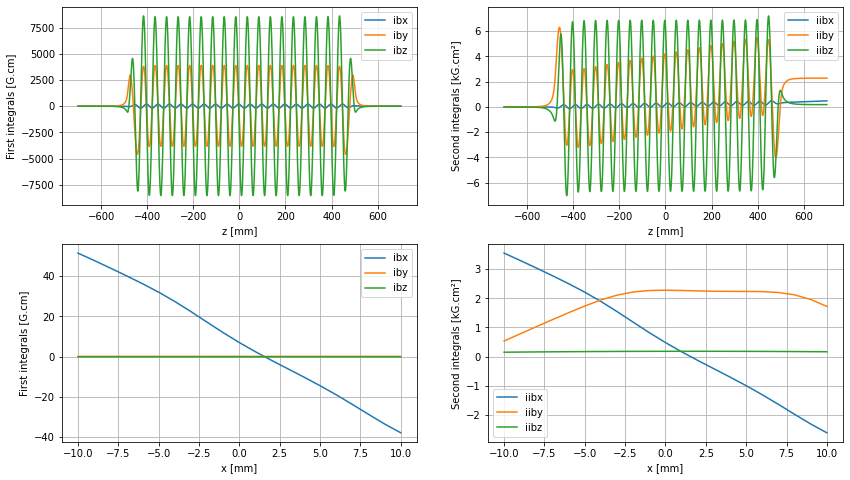

In [9]:
# Integrals

ibx = []
iby = []
ibz = []
iibx = []
iiby = []
iibz = []

ib, iib = papu.calc_field_integrals(z_list=z, x=0, y=0)

ibx0 = ib[:, 0]
iby0 = ib[:, 1]
ibz0 = ib[:, 2]
iibx0 = iib[:, 0]
iiby0 = iib[:, 1]
iibz0 = iib[:, 2]

for xp in x:
    field = papu.get_field(x=xp, y=0, z=z)
    ib, iib = papu.calc_field_integrals(z_list=z, x=xp, y=0, field_list=field)
    ibx.append(ib[-1,0])
    iby.append(ib[-1,1])
    ibz.append(ib[-1,2])
    iibx.append(iib[-1,0])
    iiby.append(iib[-1,1])
    iibz.append(iib[-1,2])

fig, ax = plt.subplots(2, 2, figsize=(14, 8))

ax[0,0].plot(z, ibx0, label='ibx')
ax[0,0].plot(z, iby0, label='iby')
ax[0,0].plot(z, ibz0, label='ibz')
ax[0,0].set_ylabel('First integrals [G.cm]')
ax[0,0].set_xlabel('z [mm]')
ax[0,0].legend()
ax[0,0].grid()

ax[0,1].plot(z, iibx0, label='iibx')
ax[0,1].plot(z, iiby0, label='iiby')
ax[0,1].plot(z, iibz0, label='iibz')
ax[0,1].set_ylabel('Second integrals [kG.cm²]')
ax[0,1].set_xlabel('z [mm]')
ax[0,1].legend()
ax[0,1].grid()

ax[1,0].plot(x, ibx, label='ibx')
ax[1,0].plot(x, iby, label='iby')
ax[1,0].plot(x, ibz, label='ibz')
ax[1,0].set_ylabel('First integrals [G.cm]')
ax[1,0].set_xlabel('x [mm]')
ax[1,0].legend()
ax[1,0].grid()

ax[1,1].plot(x, iibx, label='iibx')
ax[1,1].plot(x, iiby, label='iiby')
ax[1,1].plot(x, iibz, label='iibz')
ax[1,1].set_ylabel('Second integrals [kG.cm²]')
ax[1,1].set_xlabel('x [mm]')
ax[1,1].legend()
ax[1,1].grid()


print('IBx [G.cm]: ', ibx0[-1])
print('IBy [G.cm]: ', iby0[-1])
print('IBz [G.cm]: ', ibz0[-1])
print('IIBx [kG.cm²]: ', iibx0[-1])
print('IIBy [kG.cm²]: ', iiby0[-1])
print('IIBz [kG.cm²]: ', iibz0[-1])

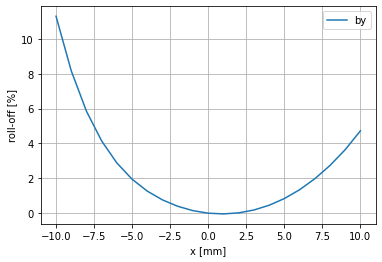

In [10]:
# roll-off

roll_off = papu.calc_roll_off_amplitude(z, x)

#plt.plot(roll_off[0, :]*100, label='bx')
plt.plot(x, roll_off[1, :]*100, label='by')
#plt.plot(roll_off[2, :]*100, label='bz')
plt.ylabel('roll-off [%]')
plt.xlabel('x [mm]')
plt.legend()
plt.grid()

Phase error [°]:  0.6726018494657898


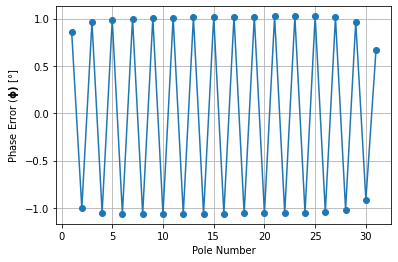

In [11]:
# phase error

traj = papu.calc_trajectory(energy, [0, 0, z[0], 0, 0, 1], z[-1], rkstep)
kh, kv = papu.calc_deflection_parameter(bxamp, byamp)
zpe, pe, perms = papu.calc_phase_error(
    energy, traj, bxamp, byamp, skip_poles=skip_poles)

pe *= 180/np.pi
perms *= 180/np.pi

poles = list(range(1, len(pe)+1))

plt.plot(poles, pe, '-o')
plt.ylabel(r'Phase Error ($\mathbf{\phi)}$ [°]')
plt.xlabel('Pole Number')
plt.grid()

print('Phase error [°]: ', pe[-1])